In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brain-tumor-detection-ml-code.zip to brain-tumor-detection-ml-code.zip


In [ ]:
# Unzip the dataset and code files
!unzip /content/archive\ \(1\).zip -d /content/brain_tumor_dataset/
!unzip /content/brain-tumor-detection-ml-code.zip -d /content/brain_tumor_code/


Archive:  /content/archive (1).zip
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/brain_tumor_dataset/brain_tumor_dataset/no/20 no.jpg  
  inflating: /content/brain_tumor_dataset

In [ ]:
!pip install tensorflow==2.4.1 opencv-python imutils scikit-learn matplotlib


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install opencv-python imutils scikit-learn matplotlib


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from imutils import paths


In [ ]:
# Define the dataset path
dataset_path = '/content/brain_tumor_dataset/'

# Load image paths
image_paths = list(paths.list_images(dataset_path))

images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]  # Extract label (yes/no)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize images to 224x224
    images.append(image)
    labels.append(label)

# Convert to numpy arrays and normalize images
images = np.array(images) / 255.0
labels = np.array(labels)

# One-hot encode the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

# Convert to categorical labels
labels = np.asarray(labels)


In [ ]:
# Split the dataset into train and test sets
train_X, test_X, train_Y, test_Y = train_test_split(images, labels, test_size=0.10, random_state=42, stratify=labels)


In [ ]:
# Set up data augmentation for training
train_generator = ImageDataGenerator(fill_mode='nearest', rotation_range=15)


In [ ]:
# Define the model architecture using VGG16
base_model = VGG16(weights='imagenet', input_tensor=Input(shape=(224, 224, 3)), include_top=False)

# Add custom layers
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model = Model(inputs=base_model.input, outputs=base_output)
model.compile(optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'], loss='binary_crossentropy')


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
print("train_Y shape:", train_Y.shape)
print("Unique values in train_Y:", np.unique(train_Y))


train_Y shape: (455, 1)
Unique values in train_Y: [0 1]


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input layer
inputs = Input(shape=(224, 224, 3))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)  # Flatten the output of the convolutional layers

# Add a fully connected layer and the output layer
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               50466944  
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                           

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the input layer
inputs = Input(shape=(224, 224, 3))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)  # Add another convolutional layer
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)  # Add a deeper convolutional layer
x = MaxPooling2D((2, 2))(x)

# Replace Flatten with Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer and the output layer
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7385

In [ ]:
# Train the model using the train_generator for data augmentation
history = model.fit(
    train_generator.flow(train_X, train_Y, batch_size=32),
    steps_per_epoch=len(train_X) // 32,
    epochs=25,
    validation_data=(test_X, test_Y)
)


Epoch 1/25
14/14 [==============================] - 50s 3s/step - loss: 0.6533 - accuracy: 0.5839 - val_loss: 0.6376 - val_accuracy: 0.6078
Epoch 2/25
14/14 [==============================] - 46s 3s/step - loss: 0.6406 - accuracy: 0.6194 - val_loss: 0.6453 - val_accuracy: 0.6078
Epoch 3/25
14/14 [==============================] - 46s 3s/step - loss: 0.6438 - accuracy: 0.6147 - val_loss: 0.6310 - val_accuracy: 0.6078
Epoch 4/25
14/14 [==============================] - 48s 3s/step - loss: 0.6248 - accuracy: 0.6147 - val_loss: 0.6923 - val_accuracy: 0.5098
Epoch 5/25
14/14 [==============================] - 46s 3s/step - loss: 0.6747 - accuracy: 0.5390 - val_loss: 0.6417 - val_accuracy: 0.6078
Epoch 6/25
14/14 [==============================] - 46s 3s/step - loss: 0.6422 - accuracy: 0.6076 - val_loss: 0.6304 - val_accuracy: 0.6078
Epoch 7/25
14/14 [==============================] - 47s 3s/step - loss: 0.6256 - accuracy: 0.6170 - val_loss: 0.6148 - val_accuracy: 0.6078
Epoch 8/25
14/14 [==

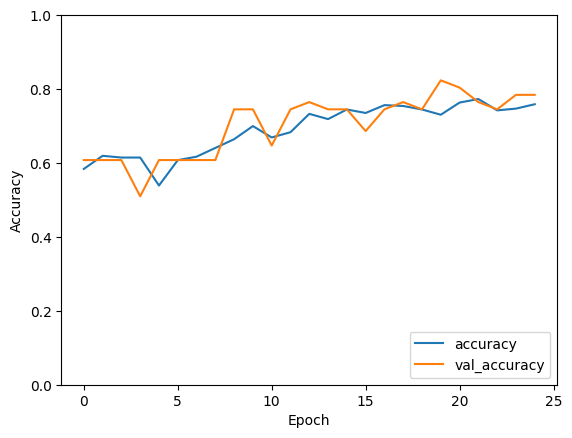

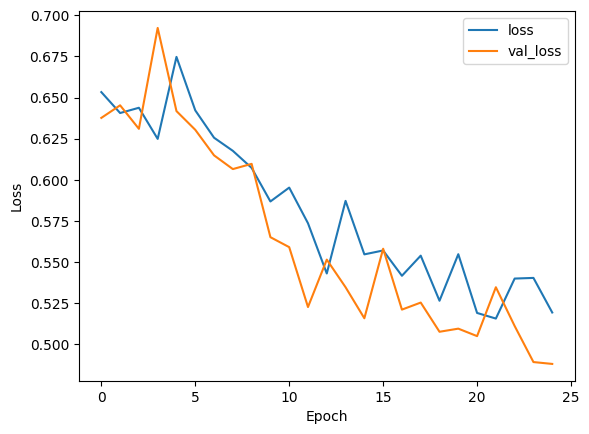

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


2/2 - 3s - loss: 0.4881 - accuracy: 0.7843 - 3s/epoch - 2s/step
Test accuracy: 0.78


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Y4.jpg to Y4.jpg


In [ ]:
import cv2
import numpy as np

# Assuming 'Y6.jpg' is uploaded
image_path = "Y4.jpg"  # File name after upload
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image to match model input size
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(image)
predicted_class = label_binarizer.inverse_transform(prediction)
print(f"Predicted class for the image {image_path}: {predicted_class}")

1/1 [==============================] - 0s 142ms/step
Predicted class for the image Y4.jpg: ['yes']


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving no 95.jpg to no 95.jpg


In [ ]:
import cv2
import numpy as np

# Assuming 'Y6.jpg' is uploaded
image_path = "no 95.jpg"  # File name after upload
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image to match model input size
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(image)
predicted_class = label_binarizer.inverse_transform(prediction)
print(f"Predicted class for the image {image_path}: {predicted_class}")

1/1 [==============================] - 0s 46ms/step
Predicted class for the image no 95.jpg: ['yes']


In [ ]:
import cv2
import numpy as np

# Assuming 'no 95.jpg' is uploaded
image_path = "no 95.jpg"  # File name after upload
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image to match model input size
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(image)

# Assuming the labels are 'no' and 'yes', based on your description.
# Inverse transform the prediction to the actual class
predicted_class = label_binarizer.inverse_transform(prediction)

# Check if the prediction corresponds to 'yes' (brain tumor) or 'no'
if predicted_class == 'yes':
    print(f"The model predicts: Yes, the image shows a brain tumor.")
else:
    print(f"The model predicts: No, the image does not show a brain tumor.")


1/1 [==============================] - 0s 143ms/step
The model predicts: Yes, the image shows a brain tumor.
